In [1]:
import scanpy as sc
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import warnings
from numba.core.errors import NumbaDeprecationWarning

warnings.filterwarnings(action="ignore", category=NumbaDeprecationWarning)
warnings.filterwarnings(
    action="ignore", module="scanpy", message="No data for colormapping"
)
%matplotlib inline

In [2]:
import anndata2ri
import logging
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

/tmp/ipykernel_125/2174054843.py:8: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


# Loading Dataset

In [3]:
%%R
data <- readRDS("mesoderm-development_loh (1).rds")
class(data)

[1] "dynwrap::with_cell_waypoints" "dynwrap::with_prior"         
[3] "dynwrap::with_expression"     "dynwrap::with_trajectory"    
[5] "dynwrap::with_grouping"       "dynwrap::data_wrapper"       
[7] "list"                        


In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages


In [4]:
%%R
print(str(data))

List of 21
 $ id                   : chr "real/gold/mesoderm-development_loh"
 $ cell_ids             : chr [1:504] "SRR3952323" "SRR3952325" "SRR3952326" "SRR3952327" ...
 $ cell_info            :'data.frame':	504 obs. of  4 variables:
  ..$ cell_id     : chr [1:504] "SRR3952323" "SRR3952325" "SRR3952326" "SRR3952327" ...
  ..$ Run         : chr [1:504] "SRR3952323" "SRR3952325" "SRR3952326" "SRR3952327" ...
  ..$ LibraryName : chr [1:504] "H7hESC" "H7hESC" "H7hESC" "H7hESC" ...
  ..$ milestone_id: chr [1:504] "H7hESC" "H7hESC" "H7hESC" "H7hESC" ...
 $ source               : chr "real/gold"
 $ normalisation_info   :List of 3
  ..$ has_spike          : logi TRUE
  ..$ has_mito           : logi TRUE
  ..$ normalisation_steps:Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	6 obs. of  3 variables:
  .. ..$ type     : chr [1:6] "original" "cell_quality_filtering" "feature_expression_filtering" "normalisation" ...
  .. ..$ nfeatures: int [1:6] 58480 58480 36347 36347 8772 8772
  .. ..$ ncells   :

In [5]:
%%R
print(data$normalisation_info$normalisation_steps)

                           type nfeatures ncells
1                      original     58480    651
2        cell_quality_filtering     58480    504
3  feature_expression_filtering     36347    504
4                 normalisation     36347    504
5 feature_variability_filtering      8772    504
6               final_filtering      8772    504


In [6]:
%%R
print(data$prior_information)

$start_milestones
[1] "H7hESC"

$start_id
[1] "SRR3952356"

$end_milestones
[1] "H7_derived_D5CntrlDrmmtm" "H7_derived_Sclrtm"       
[3] "H7_derived_D3GARPpCrdcM" 

$end_id
[1] "SRR3952713" "SRR3952690" "SRR3952891"

$groups_id
       cell_id                 group_id
1   SRR3952323                   H7hESC
2   SRR3952325                   H7hESC
3   SRR3952326                   H7hESC
4   SRR3952327                   H7hESC
5   SRR3952328                   H7hESC
6   SRR3952329                   H7hESC
7   SRR3952330                   H7hESC
8   SRR3952331                   H7hESC
9   SRR3952337                   H7hESC
10  SRR3952341                   H7hESC
11  SRR3952342                   H7hESC
12  SRR3952343                   H7hESC
13  SRR3952344                   H7hESC
14  SRR3952345                   H7hESC
15  SRR3952347                   H7hESC
16  SRR3952348                   H7hESC
17  SRR3952349                   H7hESC
18  SRR3952350                   H7hESC
19  SRR3952

199 SRR3952583      H7_derived_DLL1pPXM
200 SRR3952584      H7_derived_DLL1pPXM
201 SRR3952585      H7_derived_DLL1pPXM
202 SRR3952586      H7_derived_DLL1pPXM
203 SRR3952587      H7_derived_DLL1pPXM
204 SRR3952588      H7_derived_DLL1pPXM
205 SRR3952590      H7_derived_DLL1pPXM
206 SRR3952591      H7_derived_DLL1pPXM
207 SRR3952592      H7_derived_DLL1pPXM
208 SRR3952593      H7_derived_DLL1pPXM
209 SRR3952594      H7_derived_DLL1pPXM
210 SRR3952595      H7_derived_DLL1pPXM
211 SRR3952596      H7_derived_DLL1pPXM
212 SRR3952598          H7_derived_ESMT
213 SRR3952599          H7_derived_ESMT
214 SRR3952600          H7_derived_ESMT
215 SRR3952601          H7_derived_ESMT
216 SRR3952602          H7_derived_ESMT
217 SRR3952603          H7_derived_ESMT
218 SRR3952604          H7_derived_ESMT
219 SRR3952605          H7_derived_ESMT
220 SRR3952606          H7_derived_ESMT
221 SRR3952607          H7_derived_ESMT
222 SRR3952608          H7_derived_ESMT
223 SRR3952610          H7_derived_ESMT


403 SRR3952812         H7_derived_D2LtM
404 SRR3952813         H7_derived_D2LtM
405 SRR3952814         H7_derived_D2LtM
406 SRR3952815         H7_derived_D2LtM
407 SRR3952816         H7_derived_D2LtM
408 SRR3952817         H7_derived_D2LtM
409 SRR3952818         H7_derived_D2LtM
410 SRR3952819         H7_derived_D2LtM
411 SRR3952820         H7_derived_D2LtM
412 SRR3952821         H7_derived_D2LtM
413 SRR3952822         H7_derived_D2LtM
414 SRR3952823         H7_derived_D2LtM
415 SRR3952825         H7_derived_D2LtM
416 SRR3952827         H7_derived_D2LtM
417 SRR3952829         H7_derived_D2LtM
418 SRR3952830         H7_derived_D2LtM
419 SRR3952831         H7_derived_D2LtM
420 SRR3952832         H7_derived_D2LtM
421 SRR3952885  H7_dreived_D2.25_Smtmrs
422 SRR3952886  H7_dreived_D2.25_Smtmrs
423 SRR3952887  H7_dreived_D2.25_Smtmrs
424 SRR3952889  H7_dreived_D2.25_Smtmrs
425 SRR3952890  H7_dreived_D2.25_Smtmrs
426 SRR3952891  H7_dreived_D2.25_Smtmrs
427 SRR3952892  H7_dreived_D2.25_Smtmrs


 [181] "HEYL"            "S100A6"          "VAMP8"           "ETV1"           
 [185] "AFAP1L2"         "ABCA1"           "FREM1"           "ITPR1"          
 [189] "AC087073.1"      "SEMA6D"          "PPM1H"           "RP11-90D4.3"    
 [193] "ANKRD18CP"       "GNG2"            "FLNC"            "EPHA2"          
 [197] "CCNA2"           "APOL2"           "HOXB1"           "MBNL3"          
 [201] "ANXA3"           "MAL2"            "TMTC2"           "LGALS1"         
 [205] "DMKN"            "STRA6"           "CDH2"            "NEFM"           
 [209] "HIST1H2AM"       "MAMLD1"          "RP4-590F24.2"    "AMOTL2"         
 [213] "ADD2"            "LY6G6D"          "ROR2"            "HOXA1"          
 [217] "TTN"             "NMRK2"           "DACT1"           "CEP85"          
 [221] "DLL3"            "IER3"            "TSPAN7"          "PDK1"           
 [225] "NKAIN1"          "RP11-35J1.2"     "SLC7A11"         "CDADC1"         
 [229] "ODC1"            "RUNX1T1"         "SERPINE2

 [593] "SLC6A6"          "UCKL1"           "UNG"             "RASGEF1B"       
 [597] "NANOGP8"         "SLC1A5"          "DDAH1"           "PSMB8"          
 [601] "AKAP2"           "TUBA1C"          "TAGLN"           "ENO2"           
 [605] "HIST1H1A"        "SPP1"            "SH2B3"           "DFNA5"          
 [609] "UCP2"            "CHCHD4"          "GPRC5C"          "EXOSC5"         
 [613] "TRIB1"           "MCC"             "VSIG10"          "FOXD2"          
 [617] "LFNG"            "ITGA8"           "PAK1IP1"         "ZHX3"           
 [621] "SLC39A14"        "TSTD1"           "MAP2K1"          "ABHD4"          
 [625] "RNF11"           "PSMG1"           "C3orf58"         "KIRREL"         
 [629] "NES"             "USP36"           "STMN2"           "ADAM19"         
 [633] "COL26A1"         "GINS1"           "TXNIP"           "MAP3K4"         
 [637] "TMEM132C"        "E2F4"            "MAD2L2"          "RNF40"          
 [641] "CELF2"           "ASNS"            "RNF138" 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[3809] "SEC13"           "DLG3"            "STARD13"         "KIAA1217"       
[3813] "FAR2P2"          "SUPT5H"          "CCDC3"           "ZBTB21"         
[3817] "CCDC85A"         "MFSD5"           "RP4-761J14.8"    "NELFCD"         
[3821] "GMEB1"           "MORC2-AS1"       "PRSS48"          "CABYR"          
[3825] "ADIPOR2"         "ARHGAP19"        "TMEM223"         "FICD"           
[3829] "RP11-366L20.2"   "PUDP"            "ASNSD1"          "CDS1"           
[3833] "CES1"            "COLGALT2"        "WRNIP1"          "GABPA"          
[3837] "PLAC1"           "TCEB3"           "RP11-989E6.10"   "TROAP"          
[3841] "ESYT1"           "INSIG1"          "ZMIZ1"           "SUCLA2"         
[3845] "ALKBH3"          "DROSHA"          "METTL18"         "EAF2"           
[3849] "TAF12"           "RP13-39P12.3"    "CASC5"           "WDR81"          
[3853] "RP11-80H18.3"    "CTD-2506P8.6"    "RP11-400F19.6"   "FAM134C"        
[3857] "GRHPR"           "NIN"             "SLC9A3R1

[4221] "SHPK"            "SLC25A12"        "C16orf91"        "PCDHGB7"        
[4225] "AKAP8L"          "RAB11FIP2"       "HDX"             "ARHGAP23"       
[4229] "ACP6"            "RP11-681H18.2"   "NME1-NME2"       "DLX4"           
[4233] "AC005083.1"      "SERGEF"          "PARP9"           "LYST"           
[4237] "FIGNL1"          "DHX40"           "CEP55"           "MSANTD3-TMEFF1" 
[4241] "PRUNE"           "YAE1D1"          "NDEL1"           "SNX30"          
[4245] "GSTT1"           "NUDCD3"          "BBS7"            "TBP"            
[4249] "AHCYL2"          "CALCOCO2"        "TMEM42"          "SOS2"           
[4253] "BICD1"           "HDHD2"           "RNPEP"           "FOXK2"          
[4257] "EMC7"            "CREBL2"          "C5orf34"         "PCDHA11"        
[4261] "STARD4-AS1"      "TMEM256-PLSCR3"  "PTPN2P1"         "AC012501.3"     
[4265] "TBC1D15"         "NKX3-2"          "AAGAB"           "CXCR5"          
[4269] "ACO1"            "ABCB7"           "PLSCR5" 

[4633] "SAFB"            "ZFP62"           "ZDHHC4"          "TMPRSS11E"      
[4637] "KHK"             "PGGT1B"          "ARAP1"           "ZNF565"         
[4641] "RABGGTA"         "LONP1"           "ZNF148"          "LRRC14"         
[4645] "ALKBH2"          "PPP3CB"          "UBXN11"          "AMT"            
[4649] "ARHGAP19-SLIT1"  "ZNF136"          "AC004076.5"      "RINT1"          
[4653] "TSPEAR-AS1"      "SCO2"            "CUL4B"           "PARP4"          
[4657] "PTPRG-AS1"       "RP11-119H12.4"   "BAG6"            "USP5"           
[4661] "FOXF2"           "OPRK1"           "TOP1MT"          "RNF216"         
[4665] "STX18"           "OGFOD2"          "OPCML"           "SDR39U1"        
[4669] "CRIP1"           "ADAM9"           "PRKAG2"          "RWDD2B"         
[4673] "ZNF223"          "SESN1"           "TCP11X2"         "METTL3"         
[4677] "UBXN2B"          "SPINK2"          "PAPD4"           "APOM"           
[4681] "CCNT1"           "CNTN4"           "CHRNA10"

[5045] "NDUFAF3"         "FLVCR2"          "FLOT1"           "ULK1"           
[5049] "RNF214"          "LGALSL"          "CYB5D1"          "GNPAT"          
[5053] "SLAIN2"          "ZNF407"          "TESK2"           "SURF1"          
[5057] "UPK3BL"          "NPTN-IT1"        "PHKG2"           "ZC3HC1"         
[5061] "DGCR14"          "ZKSCAN5"         "C6orf136"        "SLC39A6"        
[5065] "LZTFL1"          "PDXDC1"          "SLC25A46"        "C20orf196"      
[5069] "NT5C3B"          "SLC40A1"         "RWDD3"           "CIB1"           
[5073] "POU3F2"          "DNAJC14"         "ABHD16A"         "TMF1"           
[5077] "RP11-276H19.2"   "RNF19B"          "PSMG3"           "TMED1"          
[5081] "COG3"            "FHL1"            "STK19"           "TXNL4B"         
[5085] "OBFC1"           "ZNF668"          "VEGFC"           "PCYT1B"         
[5089] "ZNF468"          "RBM22"           "DUS4L"           "TTC32"          
[5093] "TPP1"            "XPNPEP1"         "ARL17B" 

[5457] "NEK3"            "C7orf55-LUC7L2"  "NDST2"           "CRELD1"         
[5461] "EIF4EBP3"        "HERC1"           "IL6"             "ZNF878"         
[5465] "RP11-1017G21.3"  "SLC25A20"        "RP11-298D21.1"   "SNAPC5"         
[5469] "TOM1"            "OS9"             "MORC2"           "OSCP1"          
[5473] "PQLC3"           "TLN2"            "ABHD14A"         "CTD-2555O16.2"  
[5477] "PSMD6-AS2"       "STARD5"          "FAM21C"          "CTD-2228K2.7"   
[5481] "TARSL2"          "FBXO18"          "SHARPIN"         "PDIK1L"         
[5485] "ARMCX5-GPRASP2"  "MARCH3"          "FCHSD2"          "PDSS2"          
[5489] "SLC29A2"         "POLL"            "CLSTN3"          "LRRC1"          
[5493] "HARBI1"          "SLX1B-SULT1A4"   "ZNF324"          "CORO2B"         
[5497] "BBS10"           "CCDC134"         "GPR3"            "GALNT11"        
[5501] "DERA"            "C1orf94"         "ZNF182"          "SLC18A2"        
[5505] "DYNLT3"          "ONECUT2"         "ATP10A" 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
%%R -o clusters_map
clusters_map = data$prior_information$groups_id
expression_matrix = data$expression
write.csv(expression_matrix, 'mesoderm_expression_matrix.csv')

In [8]:
import scanpy as sc
import pandas as pd
import numpy as np

expression_matrix = pd.read_csv("mesoderm_expression_matrix.csv", index_col=0)
expression_matrix

,COL3A1,DKK4,CXCR4,RP11-513I15.6,MIXL1,ANXA1,NODAL,DKK1,CER1,WNT3,...,OPRL1,CTD-2003C8.2,RP4-814D15.1,RP11-366M4.6,LHX6,NBEAP3,HLCS-IT1,RP11-44F14.5,AC073257.2,RP1-28C20.1
SRR3952323,0.626748,0.000000,2.912451,5.820081,1.396291,3.432083,0.000000,2.559913,0.0,1.667356,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
SRR3952325,0.000000,0.756380,1.909576,8.702574,1.617177,1.250048,0.000000,2.152584,0.0,2.542191,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
SRR3952326,4.691849,0.000000,2.362032,0.000000,0.000000,3.746616,0.000000,1.618460,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
SRR3952327,0.000000,0.000000,2.474109,5.842563,0.000000,1.096977,0.650333,3.071057,0.0,1.437542,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
SRR3952328,0.000000,0.000000,2.341608,0.000000,1.892371,3.391434,0.000000,3.191775,0.0,1.892371,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR3952967,0.000000,0.000000,8.221294,0.000000,6.335195,6.485410,0.000000,1.820240,0.0,2.599984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
SRR3952968,0.000000,3.056936,5.288158,7.869382,1.301240,10.158909,0.000000,2.777709,0.0,1.301240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.441875,0.0,0.0
SRR3952969,1.124419,0.000000,7.427271,0.000000,1.124419,9.785555,0.000000,5.518700,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
SRR3952970,0.000000,3.253557,8.936803,3.427168,0.000000,4.520589,0.000000,3.253557,0.0,1.782066,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [9]:
adata = sc.AnnData(expression_matrix)
ad = adata
adata

AnnData object with n_obs × n_vars = 504 × 8772

In [10]:
sc.pp.pca(ad)
sc.pp.neighbors(ad)
sc.tl.umap(ad)
sc.tl.diffmap(ad)

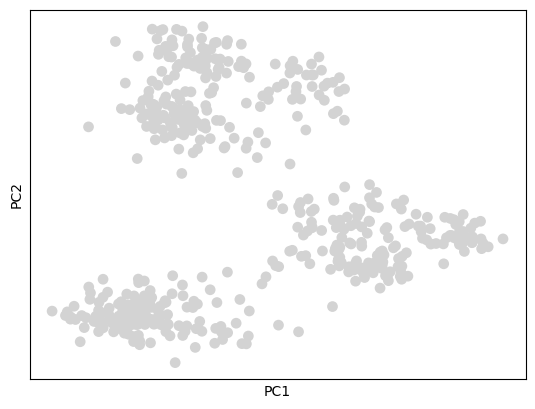

In [11]:
sc.pl.embedding(
    ad,
    basis="pca",
)

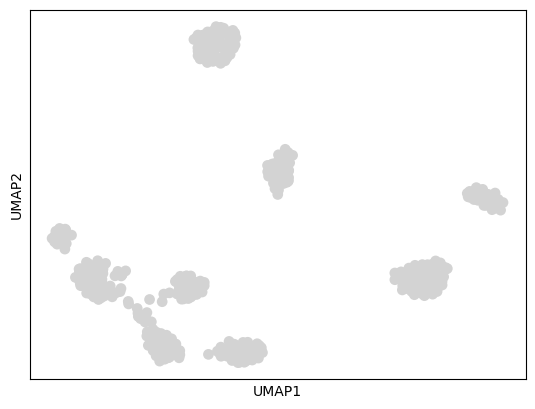

In [12]:
sc.pl.embedding(
    ad,
    basis="umap",
)

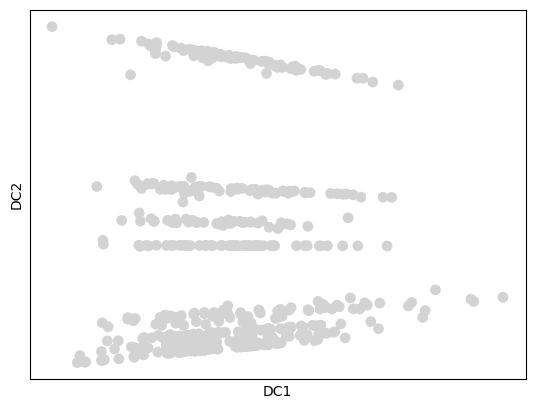

In [13]:
sc.pl.embedding(
    ad,
    basis="diffmap",
)

In [14]:
clusters_map

,cell_id,group_id
1,SRR3952323,H7hESC
2,SRR3952325,H7hESC
3,SRR3952326,H7hESC
4,SRR3952327,H7hESC
5,SRR3952328,H7hESC
...,...,...
500,SRR3952967,H7_dreived_D2.25_Smtmrs
501,SRR3952968,H7_dreived_D2.25_Smtmrs
502,SRR3952969,H7_dreived_D2.25_Smtmrs
503,SRR3952970,H7_dreived_D2.25_Smtmrs


In [15]:
clusters_map = clusters_map.set_index("cell_id")
adata.obs["clusters"] = adata.obs.index.map(clusters_map["group_id"])
adata.obs.clusters

SRR3952323                     H7hESC
SRR3952325                     H7hESC
SRR3952326                     H7hESC
SRR3952327                     H7hESC
SRR3952328                     H7hESC
                       ...           
SRR3952967    H7_dreived_D2.25_Smtmrs
SRR3952968    H7_dreived_D2.25_Smtmrs
SRR3952969    H7_dreived_D2.25_Smtmrs
SRR3952970    H7_dreived_D2.25_Smtmrs
SRR3952971    H7_dreived_D2.25_Smtmrs
Name: clusters, Length: 504, dtype: object

In [16]:
sc.tl.paga(adata, groups="clusters")

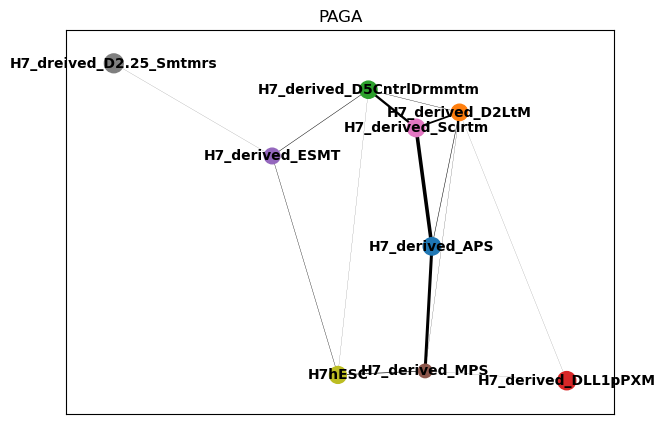

In [17]:
sc.pl.paga(adata, color="clusters", title="PAGA")

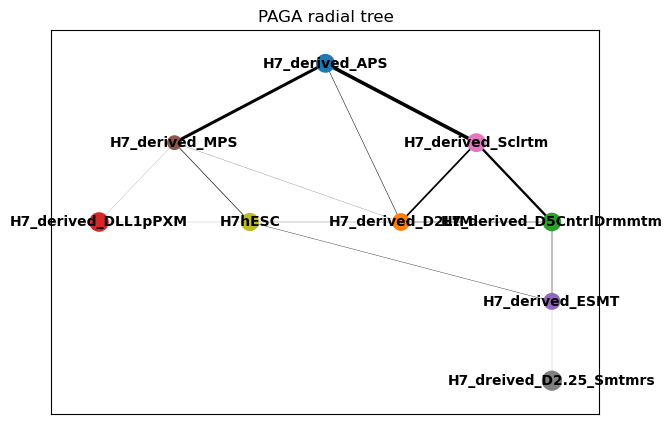

In [18]:
sc.pl.paga(adata, layout="rt", title="PAGA radial tree")

In [19]:
adjacency_matrix = adata.uns["paga"]["connectivities"]
print(adjacency_matrix)

  (0, 1)	0.04829109062980031
  (0, 5)	0.2897465437788018
  (0, 6)	0.34582651999405384
  (1, 0)	0.04829109062980031
  (1, 2)	0.03171660613397902
  (1, 3)	0.010253587736464448
  (1, 5)	0.0170116341991342
  (1, 6)	0.16901881720430106
  (2, 1)	0.03171660613397902
  (2, 3)	0.0041709509436465555
  (2, 4)	0.045671912832929776
  (2, 6)	0.22099312661095055
  (2, 7)	0.007249509973480918
  (2, 8)	0.01127701551430365
  (3, 1)	0.010253587736464448
  (3, 2)	0.0041709509436465555
  (3, 5)	0.011185732076143035
  (3, 7)	0.005859192992265399
  (3, 8)	0.00911430021019062
  (4, 2)	0.045671912832929776
  (4, 7)	0.010693027210884354
  (4, 8)	0.03326719576719577
  (5, 0)	0.2897465437788018
  (5, 1)	0.0170116341991342
  (5, 3)	0.011185732076143035
  (5, 8)	0.06048581048581048
  (6, 0)	0.34582651999405384
  (6, 1)	0.16901881720430106
  (6, 2)	0.22099312661095055
  (6, 8)	0.005365676736644479
  (7, 2)	0.007249509973480918
  (7, 3)	0.005859192992265399
  (7, 4)	0.010693027210884354
  (7, 8)	0.003960380448475687


In [20]:
cluster_names = list(adata.obs["clusters"].cat.categories)
cluster_names

['H7_derived_APS',
 'H7_derived_D2LtM',
 'H7_derived_D5CntrlDrmmtm',
 'H7_derived_DLL1pPXM',
 'H7_derived_ESMT',
 'H7_derived_MPS',
 'H7_derived_Sclrtm',
 'H7_dreived_D2.25_Smtmrs',
 'H7hESC']